In [346]:
%matplotlib inline
%run Pipeline//upload_and_vizualize 
%run Pipeline//classify_and_evaluate 
%run Pipeline//aux
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pylab as pl
import seaborn as sn

In [347]:
df_violations = read_file('data/ICIS-AIR_downloads/ICIS-AIR_VIOLATION_HISTORY.csv')

In [18]:
def get_groupby_counts(df, col_name):
    tot_count = df[col_name].count()
    count_per_group = df[col_name].value_counts().to_frame()
    count_per_group['Proportion'] = count_per_group[col_name] / tot_count
    
    count_per_count = count_per_group[col_name].value_counts().to_frame()
    count_per_count['Proportion'] = count_per_count[col_name] / count_per_count[col_name].sum()
    return tot_count, count_per_group, count_per_count

In [19]:
tot_count_viol, count_per_group_viol,  count_per_count_viol = get_groupby_counts(df_violations, 'STATE_CODE')

In [261]:
df_violations

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,...,HPV_RESOLVED_DATE_year,HPV_RESOLVED_DATE_day_num,HPV_RESOLVED_DATE_day_of_week,HPV_RESOLVED_DATE_month,HPV_RESOLVED_DATE_month_num,EARLIEST_FRV_DETERM_DATE_year,EARLIEST_FRV_DETERM_DATE_day_num,EARLIEST_FRV_DETERM_DATE_day_of_week,EARLIEST_FRV_DETERM_DATE_month,EARLIEST_FRV_DETERM_DATE_month_num
0,CT0000000900700108,3400302038,State,CT,NaN,CT000A0000090070010800028,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,...,1996,1.0,Tuesday,October,10,None,NaN,None,None,None
1,CT0000000900700108,3400302043,State,CT,NaN,CT000A0000090070010800158,FRV,CAATVP,Title V Permits,300000282,...,None,NaN,None,None,None,2013,4.0,Friday,May,05
2,CT0000000900900110,3400302044,State,CT,NaN,CT000A0000090090011000026,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,...,1996,1.0,Tuesday,October,10,None,NaN,None,None,None
3,CT0000000900900110,3400302045,State,CT,NaN,CT000A0000090090011000037,HPV,CAASIP,State Implementation Plan for National Primary...,10461 300000005,...,1999,3.0,Thursday,September,09,None,NaN,None,None,None
4,CT0000000900300125,3400302055,State,CT,NaN,CT000A0000090030012500017,HPV,CAASIP,State Implementation Plan for National Primary...,300000242 300000329,...,2007,1.0,Tuesday,July,07,None,NaN,None,None,None
5,CT0000000900508907,3400302093,State,CT,NaN,CT000A0000090050890700012,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000329,...,2010,1.0,Tuesday,November,11,None,NaN,None,None,None
6,CT0000000900100078,3400302098,State,CT,NaN,CT000A0000090010007800021,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000329,...,2009,3.0,Thursday,September,09,None,NaN,None,None,None
7,CT0000000901501125,3400302109,State,CT,NaN,CT000A0000090150112500209,HPV,CAATVP,Title V Permits,10193,...,2014,2.0,Wednesday,June,06,None,NaN,None,None,None
8,CT0000000900300171,3400302111,State,CT,NaN,CT000A0000090030017100002,HPV,CAASIP,State Implementation Plan for National Primary...,300000210,...,1999,5.0,Saturday,May,05,None,NaN,None,None,None
9,CT0000000900109058,3400302112,State,CT,NaN,CT000A0000090010905800007,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000005,...,2009,1.0,Tuesday,January,01,None,NaN,None,None,None


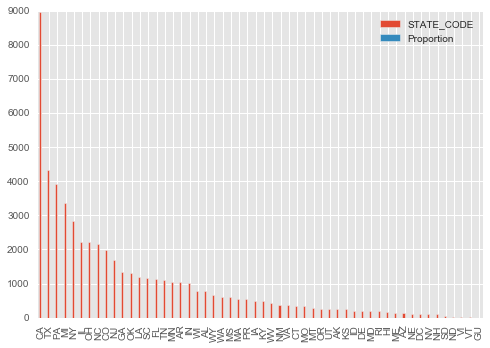

In [25]:
count_per_group_viol.plot(kind='bar')

In [348]:
date_format ='%m-%d-%Y'
date_attributes = ['HPV_DAYZERO_DATE','HPV_RESOLVED_DATE','EARLIEST_FRV_DETERM_DATE']
get_occupied_frame(df_violations,date_attributes,date_format)

In [349]:
df_violations

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,EARLIEST_FRV_DETERM_DATE,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,HPV_DAYZERO_DATE_datetime,HPV_DAYZERO_DATE_day_num,HPV_DAYZERO_DATE_weekday,HPV_DAYZERO_DATE_month_name,HPV_DAYZERO_DATE_month_num,HPV_RESOLVED_DATE_datetime,HPV_RESOLVED_DATE_day_num,HPV_RESOLVED_DATE_weekday,HPV_RESOLVED_DATE_month_name,HPV_RESOLVED_DATE_month_num,EARLIEST_FRV_DETERM_DATE_datetime,EARLIEST_FRV_DETERM_DATE_day_num,EARLIEST_FRV_DETERM_DATE_weekday,EARLIEST_FRV_DETERM_DATE_month_name,EARLIEST_FRV_DETERM_DATE_month_num
0,CT0000000900700108,3400302038,State,CT,NaN,CT000A0000090070010800028,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,NaN,05-28-1996,10-15-1996,1996-05-28,1.0,Tuesday,May,05,1996-10-15 00:00:00,1.0,Tuesday,October,10,NaN,NaN,NaN,NaN,NaN
1,CT0000000900700108,3400302043,State,CT,NaN,CT000A0000090070010800158,FRV,CAATVP,Title V Permits,300000282,NITROGEN OXIDES,05-24-2013,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-05-24 00:00:00,4.0,Friday,May,05
2,CT0000000900900110,3400302044,State,CT,NaN,CT000A0000090090011000026,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,NaN,05-28-1996,10-15-1996,1996-05-28,1.0,Tuesday,May,05,1996-10-15 00:00:00,1.0,Tuesday,October,10,NaN,NaN,NaN,NaN,NaN
3,CT0000000900900110,3400302045,State,CT,NaN,CT000A0000090090011000037,HPV,CAASIP,State Implementation Plan for National Primary...,10461 300000005,NITROGEN OXIDES NO2 Sulfur dioxide,NaN,08-21-1998,09-30-1999,1998-08-21,4.0,Friday,August,08,1999-09-30 00:00:00,3.0,Thursday,September,09,NaN,NaN,NaN,NaN,NaN
4,CT0000000900300125,3400302055,State,CT,NaN,CT000A0000090030012500017,HPV,CAASIP,State Implementation Plan for National Primary...,300000242 300000329,FACIL TOTAL HAZARDOUS AIR POLLUTANTS (HAPS),NaN,07-12-2005,07-17-2007,2005-07-12,1.0,Tuesday,July,07,2007-07-17 00:00:00,1.0,Tuesday,July,07,NaN,NaN,NaN,NaN,NaN
5,CT0000000900508907,3400302093,State,CT,NaN,CT000A0000090050890700012,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000329,FACIL,NaN,03-17-2010,11-02-2010,2010-03-17,2.0,Wednesday,March,03,2010-11-02 00:00:00,1.0,Tuesday,November,11,NaN,NaN,NaN,NaN,NaN
6,CT0000000900100078,3400302098,State,CT,NaN,CT000A0000090010007800021,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000329,FACIL,NaN,08-08-2007,09-24-2009,2007-08-08,2.0,Wednesday,August,08,2009-09-24 00:00:00,3.0,Thursday,September,09,NaN,NaN,NaN,NaN,NaN
7,CT0000000901501125,3400302109,State,CT,NaN,CT000A0000090150112500209,HPV,CAATVP,Title V Permits,10193,Carbon monoxide,NaN,04-26-2013,06-25-2014,2013-04-26,4.0,Friday,April,04,2014-06-25 00:00:00,2.0,Wednesday,June,06,NaN,NaN,NaN,NaN,NaN
8,CT0000000900300171,3400302111,State,CT,NaN,CT000A0000090030017100002,HPV,CAASIP,State Implementation Plan for National Primary...,300000210,Chromium compounds,NaN,01-01-1998,05-01-1999,1998-01-01,3.0,Thursday,January,01,1999-05-01 00:00:00,5.0,Saturday,May,05,NaN,NaN,NaN,NaN,NaN
9,CT0000000900109058,3400302112,State,CT,NaN,CT000A0000090010905800007,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000005,NITROGEN OXIDES NO2,NaN,01-17-2008,01-06-2009,2008-01-17,3.0,Thursday,January,01,2009-01-06 00:00:00,1.0,Tuesday,January,01,NaN,NaN,NaN,NaN,NaN


In [281]:
def create_date_charts(df, original_date_columns):
    for date_column in original_date_columns:
        df.sort([date_column+'_month_num']).groupby([date_column+'_month'], sort=False).size().to_frame().plot(kind='bar',color ='blue')
        df.sort([date_column+'_day_num']).groupby([date_column+'_day_of_week'], sort=False).size().to_frame().plot(kind='bar',color='green')
        df.groupby([date_column+'_year']).size().to_frame().plot(kind='area',color='orange')
    plt.show()

In [372]:
df_violations_no_date_na = df_violations.dropna(subset=['HPV_RESOLVED_DATE_datetime','HPV_DAYZERO_DATE_datetime'])
df_violations_no_date_na['DAYS_TO_RESOLVE'] = pd.to_datetime(df_violations_no_date_na['HPV_RESOLVED_DATE_datetime']).sub(pd.to_datetime(df_violations_no_date_na['HPV_DAYZERO_DATE_datetime']))
#df_no = df_violations_no_date_na['HPV_RESOLVED_DATE_datetime']- df_violations_no_date_na['HPV_DAYZERO_DATE_datetime']

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [374]:
df_violations_no_date_na.head()

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,EARLIEST_FRV_DETERM_DATE,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,HPV_DAYZERO_DATE_datetime,HPV_DAYZERO_DATE_day_num,HPV_DAYZERO_DATE_weekday,HPV_DAYZERO_DATE_month_name,HPV_DAYZERO_DATE_month_num,HPV_RESOLVED_DATE_datetime,HPV_RESOLVED_DATE_day_num,HPV_RESOLVED_DATE_weekday,HPV_RESOLVED_DATE_month_name,HPV_RESOLVED_DATE_month_num,EARLIEST_FRV_DETERM_DATE_datetime,EARLIEST_FRV_DETERM_DATE_day_num,EARLIEST_FRV_DETERM_DATE_weekday,EARLIEST_FRV_DETERM_DATE_month_name,EARLIEST_FRV_DETERM_DATE_month_num,DAYS_TO_RESOLVE
0,CT0000000900700108,3400302038,State,CT,NaN,CT000A0000090070010800028,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,NaN,05-28-1996,10-15-1996,1996-05-28,1.0,Tuesday,May,05,1996-10-15 00:00:00,1.0,Tuesday,October,10,NaN,NaN,NaN,NaN,NaN,140 days
2,CT0000000900900110,3400302044,State,CT,NaN,CT000A0000090090011000026,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,NaN,05-28-1996,10-15-1996,1996-05-28,1.0,Tuesday,May,05,1996-10-15 00:00:00,1.0,Tuesday,October,10,NaN,NaN,NaN,NaN,NaN,140 days
3,CT0000000900900110,3400302045,State,CT,NaN,CT000A0000090090011000037,HPV,CAASIP,State Implementation Plan for National Primary...,10461 300000005,NITROGEN OXIDES NO2 Sulfur dioxide,NaN,08-21-1998,09-30-1999,1998-08-21,4.0,Friday,August,08,1999-09-30 00:00:00,3.0,Thursday,September,09,NaN,NaN,NaN,NaN,NaN,405 days
4,CT0000000900300125,3400302055,State,CT,NaN,CT000A0000090030012500017,HPV,CAASIP,State Implementation Plan for National Primary...,300000242 300000329,FACIL TOTAL HAZARDOUS AIR POLLUTANTS (HAPS),NaN,07-12-2005,07-17-2007,2005-07-12,1.0,Tuesday,July,07,2007-07-17 00:00:00,1.0,Tuesday,July,07,NaN,NaN,NaN,NaN,NaN,735 days
5,CT0000000900508907,3400302093,State,CT,NaN,CT000A0000090050890700012,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000329,FACIL,NaN,03-17-2010,11-02-2010,2010-03-17,2.0,Wednesday,March,03,2010-11-02 00:00:00,1.0,Tuesday,November,11,NaN,NaN,NaN,NaN,NaN,230 days


In [286]:
pd.set_option('max_columns', 100)
df_violations.head(3)

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,EARLIEST_FRV_DETERM_DATE,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,datetime,HPV_DAYZERO_DATE_year,HPV_DAYZERO_DATE_day_num,HPV_DAYZERO_DATE_day_of_week,HPV_DAYZERO_DATE_month,HPV_DAYZERO_DATE_month_num,HPV_RESOLVED_DATE_year,HPV_RESOLVED_DATE_day_num,HPV_RESOLVED_DATE_day_of_week,HPV_RESOLVED_DATE_month,HPV_RESOLVED_DATE_month_num,EARLIEST_FRV_DETERM_DATE_year,EARLIEST_FRV_DETERM_DATE_day_num,EARLIEST_FRV_DETERM_DATE_day_of_week,EARLIEST_FRV_DETERM_DATE_month,EARLIEST_FRV_DETERM_DATE_month_num
0,CT0000000900700108,3400302038,State,CT,NaN,CT000A0000090070010800028,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,NaN,05-28-1996,10-15-1996,None,1996,1.0,Tuesday,May,05,1996,1.0,Tuesday,October,10,None,NaN,None,None,None
1,CT0000000900700108,3400302043,State,CT,NaN,CT000A0000090070010800158,FRV,CAATVP,Title V Permits,300000282,NITROGEN OXIDES,05-24-2013,NaN,NaN,2013-05-24 00:00:00,None,NaN,None,None,None,None,NaN,None,None,None,2013,4.0,Friday,May,05
2,CT0000000900900110,3400302044,State,CT,NaN,CT000A0000090090011000026,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,NaN,05-28-1996,10-15-1996,None,1996,1.0,Tuesday,May,05,1996,1.0,Tuesday,October,10,None,NaN,None,None,None


In [264]:
print('total_count_dayzero: ',len(df_violations.HPV_DAYZERO_DATE.dropna()),' total_count_resolved: ',len(df_violations.HPV_RESOLVED_DATE.dropna()))

total_count_dayzero:  35469  total_count_resolved:  41728


In [113]:
df_violations_dateinfo = pd.concat([df_violations,df_violations_hpv_date_info], join='outer')

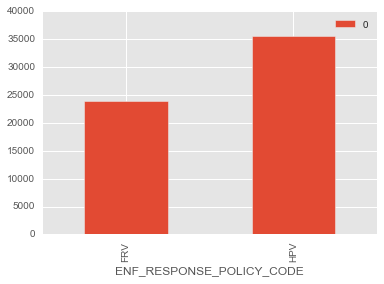

In [198]:
df_violations_hpv_date_info.groupby('ENF_RESPONSE_POLICY_CODE').size().to_frame().plot(kind='bar')

In [110]:
df_violations.count()

PGM_SYS_ID                  59329
ACTIVITY_ID                 59329
AGENCY_TYPE_DESC            59329
STATE_CODE                  54521
AIR_LCON_CODE               11300
COMP_DETERMINATION_UID      59329
ENF_RESPONSE_POLICY_CODE    59329
PROGRAM_CODES               59329
PROGRAM_DESCS               59329
POLLUTANT_CODES             53177
POLLUTANT_DESCS             53177
EARLIEST_FRV_DETERM_DATE    17188
HPV_DAYZERO_DATE            35469
HPV_RESOLVED_DATE           41728
dtype: int64

In [209]:
emissions = read_file('data/POLL_RPT_COMBINED_EMISSIONS.csv')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (3,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [271]:
emissions.head()

,REPORTING_YEAR,REGISTRY_ID,PGM_SYS_ACRNM,PGM_SYS_ID,POLLUTANT_NAME,ANNUAL_EMISSION,UNIT_OF_MEASURE,NEI_TYPE,NEI_HAP_VOC_FLAG
0,2006,110002481430,TRIS,06095TRBTC651DA,Copper,63.30,Pounds,NaN,NaN
1,2006,110000410975,TRIS,49443SNCHM4925E,Barium compounds -- TRI,0.00,Pounds,NaN,NaN
2,2006,110000410975,TRIS,49443SNCHM4925E,Lead compounds,0.12,Pounds,NaN,NaN
3,2006,110000410975,TRIS,49443SNCHM4925E,Mercury,0.01,Pounds,NaN,NaN
4,2006,110000416540,TRIS,53051RBCRPN92W1,Toluene,1164.00,Pounds,NaN,NaN


In [273]:
cross_vectors(emissions, 'POLLUTANT_NAME', 'ANNUAL_EMISSION')


ANNUAL_EMISSION,-12989.16,-9918.0,-1362.25,0.0,1.53e-19,4.46e-19,5.29e-19,5.35e-19,5.71e-19,6.67e-19,...,47717646000.0,47838144000.0,48267882000.0,48275542000.0,48762720000.0,49789704000.0,50266808000.0,50596998000.0,53087208000.0,54462174000.0
POLLUTANT_NAME,,,,,,,,,,,,,,,,,,,,,
.alpha.-Hexachlorocyclohexane,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1,1,2-Tetrachloroethane",0,0,0,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1,1-Trichloroethane",0,0,0,669,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1,2,2-Tetrachloroethane",0,0,0,253,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1,2-Trichloroethane",0,0,0,170,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1-Dichloroethane",0,0,0,162,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1-Dichloroethylene",0,0,0,68,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1-Dimethylhydrazine",0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,2,3,4,5,6-Hexachlorocyclohexane",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
emissions[['POLLUTANT_NAME','ANNUAL_EMISSION']].groupby('POLLUTANT_NAME').mean()

,ANNUAL_EMISSION
POLLUTANT_NAME,
.alpha.-Hexachlorocyclohexane,11.000000
"1,1,1,2-Tetrachloroethane",304.933233
"1,1,1-Trichloroethane",776.529731
"1,1,2,2-Tetrachloroethane",35.522883
"1,1,2-Trichloroethane",94.594339
"1,1-Dichloroethane",64.770820
"1,1-Dichloroethylene",59.344925
"1,1-Dimethylhydrazine",48.953552
"1,2,3,4,5,6-Hexachlorocyclohexane",4.456438


In [212]:
facilities = read_file('data/ICIS-AIR_downloads/ICIS-AIR_FACILITIES.csv')

In [247]:
facilities.columns


Index(['PGM_SYS_ID', 'REGISTRY_ID', 'FACILITY_NAME', 'STREET_ADDRESS', 'CITY',
       'COUNTY_NAME', 'STATE', 'ZIP_CODE', 'EPA_REGION', 'SIC_CODES',
       'NAICS_CODES', 'FACILITY_TYPE_CODE', 'AIR_POLLUTANT_CLASS_CODE',
       'AIR_POLLUTANT_CLASS_DESC', 'AIR_OPERATING_STATUS_CODE',
       'AIR_OPERATING_STATUS_DESC', 'CURRENT_HPV', 'LOCAL_CONTROL_REGION_CODE',
       'LOCAL_CONTROL_REGION_NAME'],
      dtype='object')

In [249]:
afs_facilities.columns

Index(['PLANT_ID', 'AFS_ID', 'PLANT_NAME', 'EPA_REGION',
       'PLANT_STREET_ADDRESS', 'PLANT_CITY', 'PLANT_COUNTY', 'STATE',
       'STATE_NUMBER', 'ZIP_CODE', 'PRIMARY_SIC_CODE', 'SECONDARY_SIC_CODE',
       'NAICS_CODE', 'AFS_GOV_FACILITY_CODE', 'FEDERALLY_REPORTABLE',
       'EPA_CLASSIFICATION_CODE', 'OPERATING_STATUS', 'EPA_COMPLIANCE_STATUS',
       'CURRENT_HPV', 'LOCAL_CONTROL_REGION', 'STATE_COMPLIANCE_STATUS'],
      dtype='object')

In [232]:
afs_facilities = read_file('data/afs_downloads/AFS_FACILITIES.csv')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [255]:
afs_facilities = read_file('data/afs_downloads/AFS_AIR_PRG_HIST_COMPLIANCE.csv')

In [259]:
afs_facilities.columns

Index(['AFS_ID', 'AIR_PROGRAM_CODE', 'HISTORICAL_COMPLIANCE_DATE',
       'HISTORICAL_COMPLIANCE_STATUS'],
      dtype='object')

In [236]:
icis_facilities = read_file('data/ICIS_FACILITIES.csv')

In [214]:
pollutants = read_file('data/ICIS-AIR_downloads/ICIS-AIR_POLLUTANTS.csv')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [251]:
pollutants.columns

Index(['PGM_SYS_ID', 'POLLUTANT_CODE', 'POLLUTANT_DESC', 'SRS_ID',
       'CHEMICAL_ABSTRACT_SERVICE_NMBR', 'AIR_POLLUTANT_CLASS_CODE',
       'AIR_POLLUTANT_CLASS_DESC'],
      dtype='object')

In [216]:
formal_actions = read_file('data/ICIS-AIR_downloads/ICIS-AIR_FORMAL_ACTIONS.csv')

In [252]:
formal_actions.columns

Index(['PGM_SYS_ID', 'ACTIVITY_ID', 'ENF_IDENTIFIER', 'ACTIVITY_TYPE_CODE',
       'ACTIVITY_TYPE_DESC', 'STATE_EPA_FLAG', 'ENF_TYPE_CODE',
       'ENF_TYPE_DESC', 'SETTLEMENT_ENTERED_DATE', 'PENALTY_AMOUNT'],
      dtype='object')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


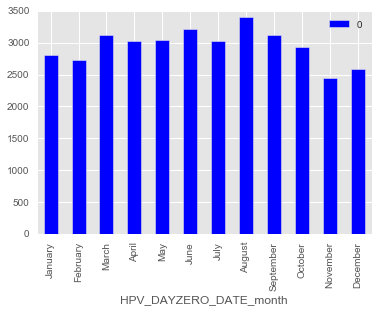

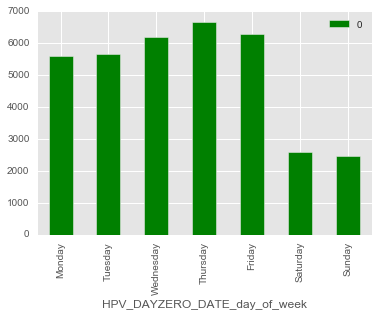

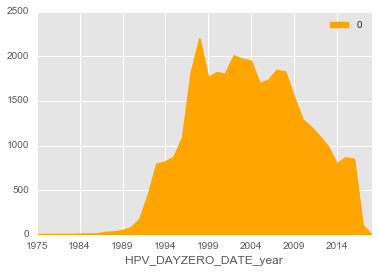

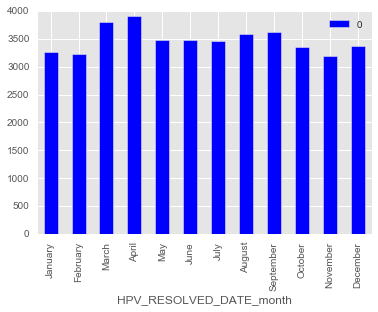

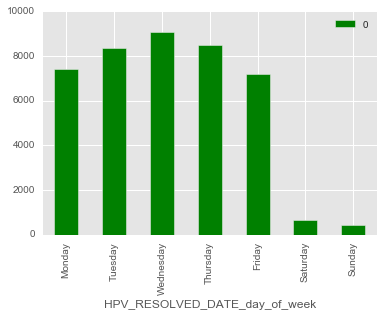

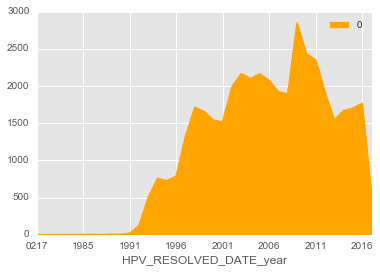

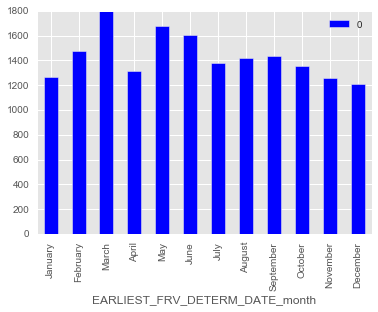

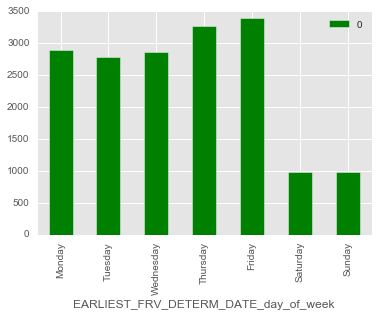

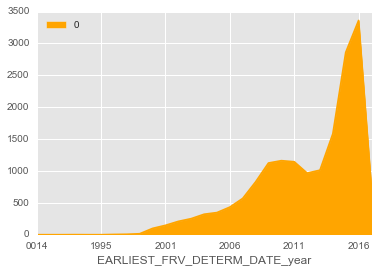

In [230]:
create_date_charts(df_violations_hpv_date_info, date_attributes)

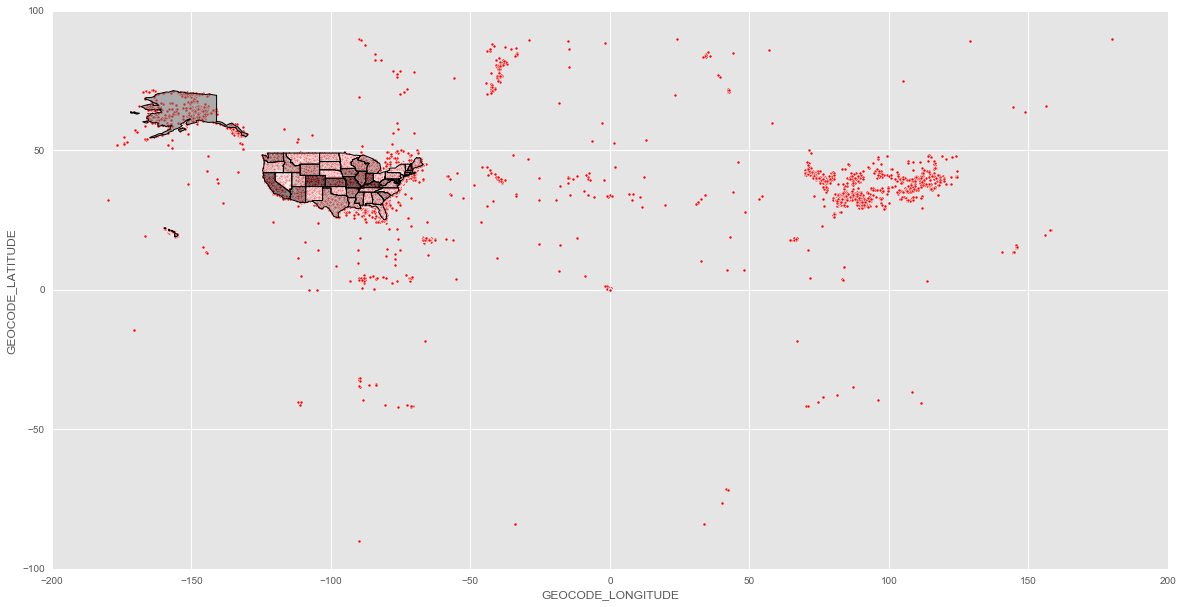

In [429]:
import geopandas as gpd
fname = 'data/us_states.geojson'
us = gpd.read_file(fname)
base = us.plot(figsize = (20,20))
npdes.plot(ax=base,kind='scatter', x='GEOCODE_LONGITUDE', y='GEOCODE_LATITUDE', s=9, c='red', figsize=(20,20))

In [431]:
## Can standardized violation informaton and concatonate violation dataFrames
